<a href="https://colab.research.google.com/github/ratral/colab_control_valves/blob/master/Sample_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing an R Packages and functions.

In [ ]:
  # Read libraries
  
  requiredPackages <- c("tidyverse", "here", "devtools")

  for(p in requiredPackages){
    if(!require( p, character.only = TRUE)) install.packages(p)
    library( p, character.only = TRUE)
  }

In [ ]:
  # Read hydraulic and valves functions
  devtools::install_github( "ratral/wcontrolvalve")

# Example 1

The goal of this exercise is to verify the operating conditions of a preset control valve. The sizing of a valve without accessories will be controlled (valve diameter equal to the diameter of the pipes), constant flow, constant pressures both upstream and downstream. The steps to follow are those:

*   Step 1. Specify the variables required for the verification of the valve size.
*   Step 2. Calculation of the coefficients.
*   Step 3. Calculate the required opening degree for the relative flow coefficient( Kv/Kvs ).
*   Step 4. testCalculate the required opening degree for the flow coefficient( $Kv$).
* Step 4. Calculate the value of sigma ($\sigma_{1}$) and its boundaries.

## Step 1. Specify the variables required for the verification of the valve size.

In [ ]:
  # Basic information
  temp <-  15.000   # °C
  elev <-   0.000   # m 
  p1   <-   5.700   # bar
  p2   <-   4.800   # bar
  flow <- 795.600   # m3/h
  d    <-   0.250   # m (DN of the valve)
  D1   <-   0.250   # m (DN Pipe Upstream)
  D2   <-   0.250   # m (DN Pipe Downstream)
  
  # Control Characteristics
  cylinder	<- "Equal Percentage"
  kv.b      <- -3.893
  kv.d	    <-  1.146
  kv.e      <- 61.038
  zvs	      <-  3.000
  fls	      <-  0.598

## Step 2. Calculation of the coefficients

In [ ]:
 # Calculation
  kvs       <- wcontrolvalve::kv_value(d, zvs)
  kv_needed <- wcontrolvalve::kv(p1, p2, flow, temp)
  kv_kvs    <- kv_needed/kvs*100
  position  <- wcontrolvalve::inv_LL3(kv_needed/kvs, kv.b, kv.d, kv.e)
  fl        <- wcontrolvalve::fl_function(position, kv.b, kv.d, kv.e, fls)
  zeta      <- wcontrolvalve::zeta_vaule(d, kv_needed)
  sig_1     <- wcontrolvalve::sigma_1(p1, p2, elev, temp)

  Sig_i     <- wcontrolvalve::Sigma_i(position,  kv.b,  kv.d,  kv.e, fls)  # Incipient Cavitation
  Sig_c     <- wcontrolvalve::Sigma_c(position,  kv.b,  kv.d,  kv.e, fls)  # Constant Cavitation
  Sig_mv    <- wcontrolvalve::Sigma_mv(position,  kv.b,  kv.d,  kv.e, fls) #  Maximum Vibration Cavitation

  # Table for the plot
  df <- tibble( factor = c( "Kv", "Kv_Kvs", "Fl", "zeta",
                            "sig_1", "Sig_i", "Sig_c", "Sig_mv"), 
                     y = c( kv_needed, kv_kvs, fl, zeta, 
                            sig_1, Sig_i, Sig_c, Sig_mv ), 
                     x = c( position, position, position, position,
                            position, position, position, position))

## Step 3. Calculate the required opening degree for the relative flow coefficient($K_{v}/K{vs}$).

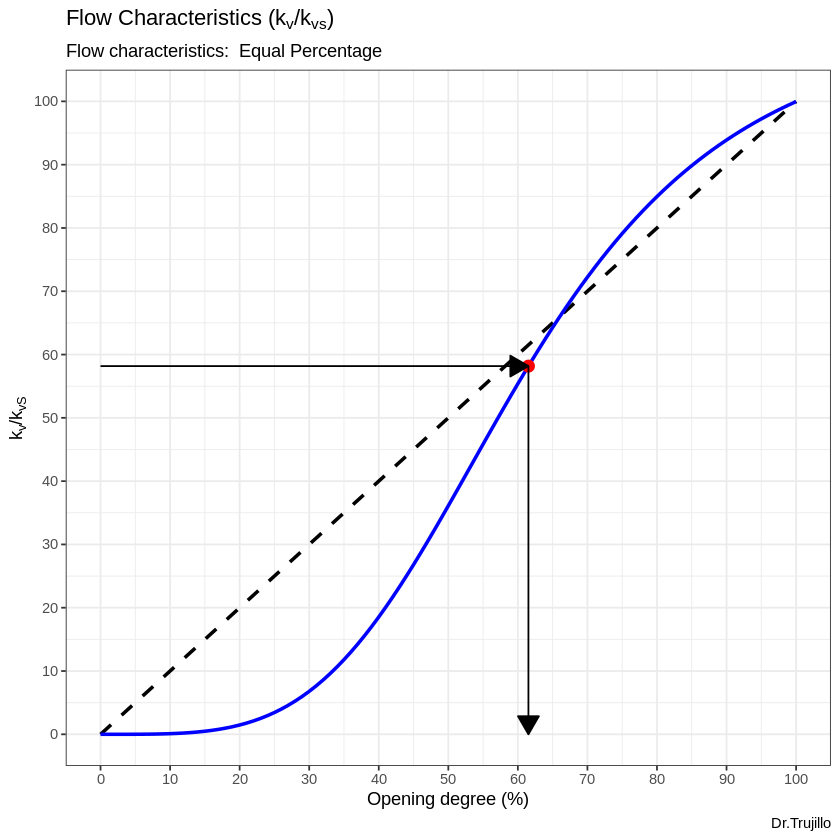

In [ ]:
  data_points <- df %>%  filter(factor == "Kv_Kvs")
  
  arrows_points <- tibble( x0 = 0,        y0 = kv_kvs,
                           x1 = position, y1 = kv_kvs,
                           x2 = position, y2 = 0)
  

  wcontrolvalve::plot_kv_kvs(kv.b, kv.d, kv.e, cylinder) +
    geom_point( data = data_points, aes( y = y, x = x ), 
                colour = "red", size = 3) +
     geom_segment(data = arrows_points, 
                  aes(x = x0, y = y0, xend = x1, yend = y1),
                  arrow = arrow(length = unit(0.03, "npc"), type = "closed"))+
     geom_segment(data = arrows_points, 
                  aes(x = x1, y = y1, xend = x2, yend = y2),
                  arrow = arrow(length = unit(0.03, "npc"), type = "closed"))

## Step 4. Calculate the required opening degree for the flow coefficient( $Kv$ ).

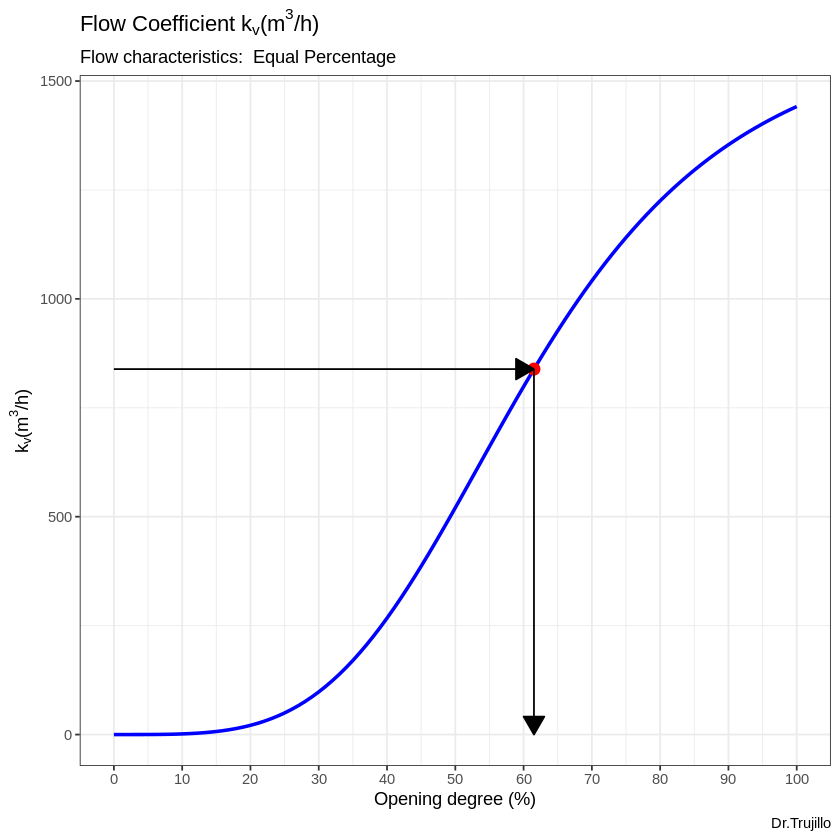

In [ ]:
  data_points <- df %>%  filter(factor == "Kv")
  
  arrows_points <- tibble( x0 = 0,        y0 = kv_needed,
                           x1 = position, y1 = kv_needed,
                           x2 = position, y2 = 0)


  wcontrolvalve::plot_kv(kv.b, kv.d, kv.e, d, zvs, cylinder) +
    geom_point( data = data_points, aes( y = y, x = x ), 
                colour = "red", size = 3) +
     geom_segment(data = arrows_points, 
                  aes(x = x0, y = y0, xend = x1, yend = y1),
                  arrow = arrow(length = unit(0.03, "npc"), type = "closed"))+
     geom_segment(data = arrows_points, 
                  aes(x = x1, y = y1, xend = x2, yend = y2),
                  arrow = arrow(length = unit(0.03, "npc"), type = "closed"))

Warning message:
“Transformation introduced infinite values in continuous y-axis”


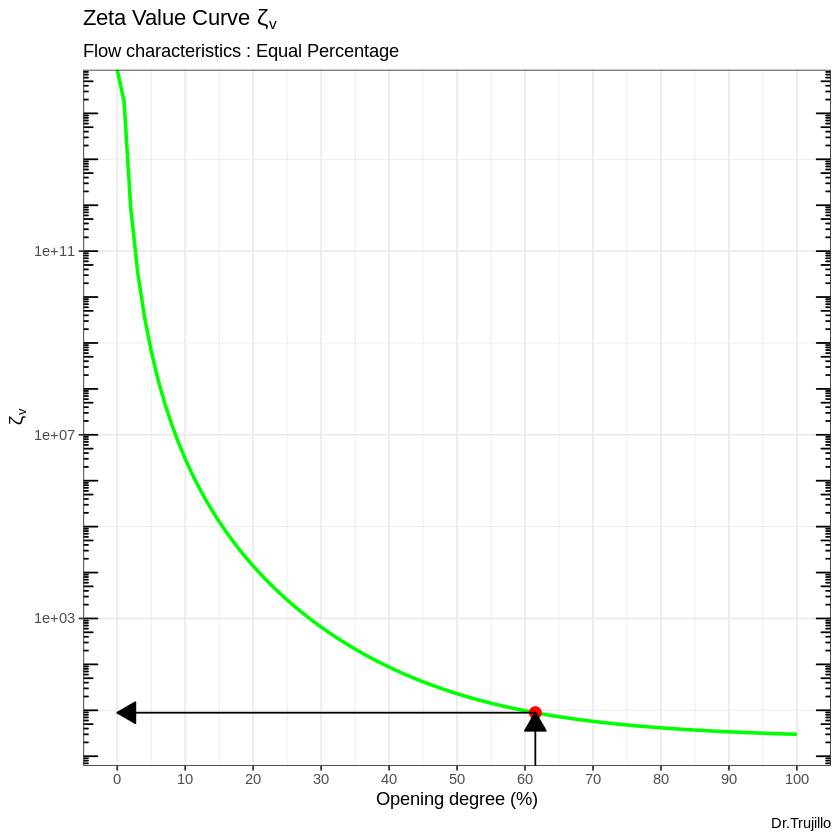

In [ ]:
  data_points <- df %>%  filter(factor == "zeta")


  arrows_points <- tibble( x0 = position, y0 = 0,
                           x1 = position, y1 = zeta,
                           x2 = 0,        y2 = zeta)


  wcontrolvalve::plot_zv(kv.b, kv.d, kv.e, zvs, cylinder) +
    geom_point( data = data_points, aes( y = y, x = x ), 
                colour = "red", size = 3)  +
     geom_segment(data = arrows_points, 
                  aes(x = x0, y = y0, xend = x1, yend = y1),
                  arrow = arrow(length = unit(0.03, "npc"), type = "closed"))+
     geom_segment(data = arrows_points, 
                  aes(x = x1, y = y1, xend = x2, yend = y2),
                  arrow = arrow(length = unit(0.03, "npc"), type = "closed"))

## Step 5. calculate the value of sigma ($\sigma$) and its boundaries.

[1] "free cavitation (regime I)"

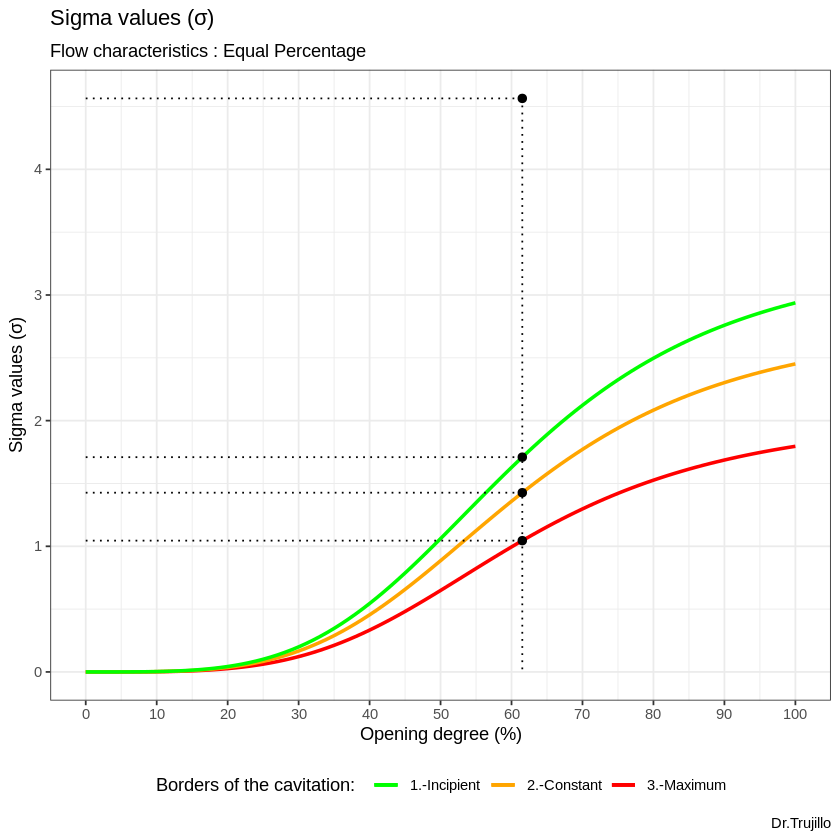

In [ ]:
  data_points <- df %>%  
    filter(factor %in% c("sig_1", "Sig_i", "Sig_c", "Sig_mv"))

  arrows_points <- tibble( x0 = 0,         y0 = sig_1,
                           x1 = position,  y1 = sig_1,
                           x2 = 0,         y2 = Sig_i,
                           x3 = position,  y3 = Sig_i,
                           x4 = 0,         y4 = Sig_c,
                           x5 = position,  y5 = Sig_c,
                           x6 = 0,         y6 = Sig_mv,
                           x7 = position,  y7 = Sig_mv,
                           x8 = position,  y8 = 0)

  # Line type : "solid", "dashed", "dotted", "dotdash", "longdash", "twodash")
  
  lty <- "dotted"
  
  wcontrolvalve::plot_sigma( kv.b, kv.d, kv.e, fls, cylinder) +
    geom_point( data = data_points, aes( y = y, x = x ), 
                colour = "black", size = 2) +
     geom_segment(data = arrows_points, aes(x = x0, y = y0, xend = x1, yend = y1), linetype = lty) +
     geom_segment(data = arrows_points, aes(x = x1, y = y1, xend = x8, yend = y8), linetype = lty) +
     geom_segment(data = arrows_points, aes(x = x2, y = y2, xend = x3, yend = y3), linetype = lty) +
     geom_segment(data = arrows_points, aes(x = x4, y = y4, xend = x5, yend = y5), linetype = lty) +
     geom_segment(data = arrows_points, aes(x = x6, y = y6, xend = x7, yend = y7), linetype = lty)
    
  wcontrolvalve::cavtation_regime(position,  kv.b,  kv.d,  kv.e, fls, sig_1)